# EMA Visulation Script VENSIM Model

Date: 28-08-2017

Mark Havelaar
Wouter Jaspers

Subject: Improving Large Intervention Decisions in Infra Asset Management

Simulation:
PATHWAYS (Constructing Adaptation Pathways)

## Intervention simulation: Simulation of 1000 runs of Road and Lock in HARD scenario
## Constructing Adaptation Pathways
## Visualize SellByDates for both Asset Systems

#1 Loading EMA Workbench & Other Relevant Packages

In [38]:
from __future__ import division


import copy
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import datetime
import math
import matplotlib.gridspec as gridspec
import pandas as pd
import tarfile

import seaborn as sns

import scipy.stats.kde as kde

from matplotlib.pyplot import pie
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.font_manager as fm

from ema_workbench import (util, TimeSeriesOutcome, perform_experiments, Constant, 
                           RealParameter, ema_logging, ScalarOutcome, load_results)

from ema_workbench.util import ema_logging, debug, info, warning, EMAError

from ema_workbench.analysis.plotting_util import prepare_data, COLOR_LIST, simple_kde, group_density,\
                                                 plot_envelope, simple_density,\
                                                 do_titles, do_ylabels, TIME, ENV_LIN, ENVELOPE, LINES,\
                                                 PATCH, LINE, TIGHT, KDE, BOXPLOT, group_results

from Figures import envelopes, lines, plot_lines_with_envelopes, string_to_upper_case, change_fig_appearance
    
__all__ = ['lines', 'envelopes', 'kde_over_time', 'multiple_densities']

TIME_LABEL = 'Time'

from ema_workbench.analysis.pairs_plotting import pairs_lines, pairs_scatter, pairs_density
import ema_workbench.analysis.plotting_util as plt_util

save = False
fig_size = (10,7)
dpi = 300
%matplotlib inline

#2 Specifying WD 

In [39]:
#Working Directory for Loading Results
wd= r'C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA'

#Working Directory for Saving Figures
wd1= r'C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\Figures'

#3 Loading Calculation File
#Road: No Intervention
#Lock: No Intervention

In [50]:
file_name = wd + '\\PATHWAYS_1000runs_SimulationFile_Road0Lock0_HARD.tar.gz'
results = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\PATHWAYS_1000runs_SimulationFile_Road0Lock0_HARD.tar.gz


#4 Getting an overview of the KPIs in the Results File

In [41]:
experiments, outcomes = results

starttime = 2017
keys = outcomes.keys()

all_KPIs = []

for key in sorted(keys):
    print(key)
    all_KPIs.append(key)

Lock System IC Factor
Road System IC Factor
Sell By Date for the Sewer System
Sell By Date of Door Height
Sell By Date of Lock Remaining Parts Height
Sell By Date of Lock System Policy IC Factor
Sell By Date of the Road System Policy
TIME


#5 Specifying Ylabels for Graphs

In [42]:
ylabels = {}
ylabels['City Area to Total Area'] = 'City Area to Total Area (%)'
ylabels['City Population'] = 'City Population (People)'
ylabels['Constructed Business'] = 'City Businessess (Buildings)'
ylabels['Constructed Houses'] = 'City Houses (Houses)'
ylabels['Harbour Area to Total Area'] = 'Harbour area to Total Area (%)'
ylabels['MTPA Distributed in Harbour'] = 'Harbour Distribution (MTPA/Year)'
ylabels['Local Economic Growth'] = 'Local Economic Growth (%)'
ylabels['Local Economy'] = 'Local Economy (Euros)'
ylabels['Total Constructed area to total area'] = 'Total Constructed Area to Total Area (%)'
ylabels['Lock System IC Factor'] = 'Lock System IC Factor (%)'
ylabels['Sell By Date of Door Height'] = 'Sell By Date (Year)'
ylabels['Sell By Date of Lock Remaining Parts Height'] = 'Sell By Date (Year)'
ylabels['Sell By Date of Lock System Policy IC Factor'] = 'Sell By Date (Year)'
ylabels['Road System IC Factor'] = 'Road System IC Factor (%)'
ylabels['Sell By Date for the Sewer System'] = 'Sell By Date (Year)'
ylabels['Sell By Date of Road System Policy'] = 'Sell By Date (Year)'
ylabels['Jobs'] = 'Jobs (Jobs)'
ylabels['Available Area'] = 'Available Area (ha)'
ylabels['Sell By Date of the Road System Policy'] = 'Sell By Date (Year)'

#6 Specifying Categories Labels per Scenario

In [43]:
#Switch Population
Categories_labels_pop = ['Low Population', 'Medium Population', 'High Population']
#Switch Urbanization
Categories_labels_urb = ['Low Urbanization', 'Medium Urbanization', 'High Urbanization']
#Switch Economy
Categories_labels_eco = ['Low Economic Growth', 'Medium Economic Growth',  'High Economic Growth']
#Switch Climate Scenario
Categories_labels_climate = ['GL Scenario', 'GH Scenario', 'WL Scenario', 'WH Scenario']
#Switch Innovation
Categories_labels_inno = ['Low Innovation', 'Medium Innovation', 'High Innovation']
#Switch Connected and Unconnected
Categories_labels_con = ['Unconnected', 'Connected']
#Switch Building Mode
Categories_labels_mode = ['ReActive', 'ProActive']
#Forecast Time Forecasting Policy
Categories_labels_Ftime = ['No Forecasting', 'Short Period Forecasting', 'Mid Period Forecasting', 'Long Period Forecasting']
#Switch Nature Scenario
Categories_labels_nature = ['No Nature Preservation', 'Nature Preservation']

## HARD Scenario Package

## Basecase

# No Road Intervention
# No Lock Intervention

Lock System IC Factor

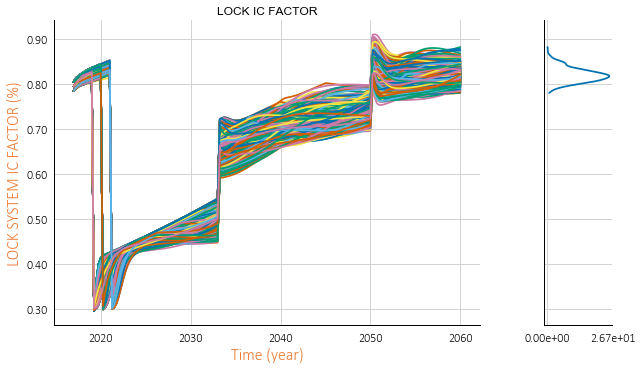

In [44]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_LockIC_0_Road0Lock0_0_lines.png', dpi=300)

Sell By Date of Lock System Policy IC Factor -> 2034 (T)

[MainProcess/WARNING] singular matrix


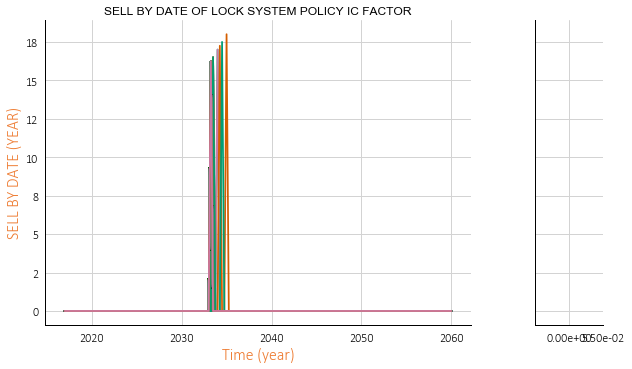

In [62]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of Lock System Policy IC Factor'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of Lock System Policy IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateLock_0_Road0Lock0_0_lines.png', dpi=300)

Sell By Date Door Height - No Sell By Date

[MainProcess/WARNING] singular matrix


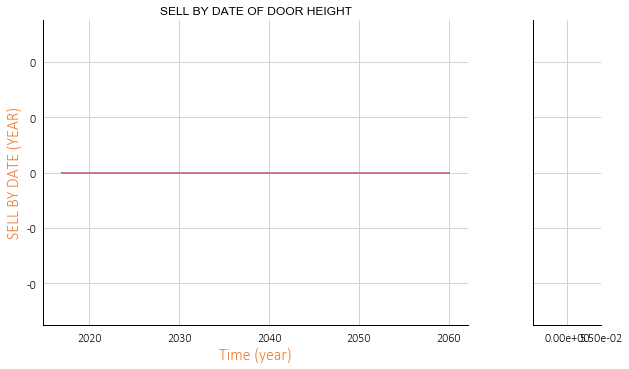

In [48]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of Door Height'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of Door Height'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_DoorHeight_0_Road0Lock0_0_lines.png', dpi=300)

Sell By Date Remaining Parts Height - 2046

[MainProcess/WARNING] singular matrix


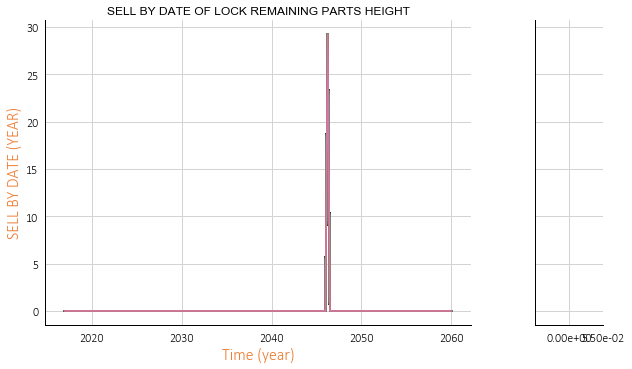

In [52]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of Lock Remaining Parts Height'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of Lock Remaining Parts Height'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_PartsHeight_0_Road0Lock0_0_lines.png', dpi=300)

Road System IC Factor

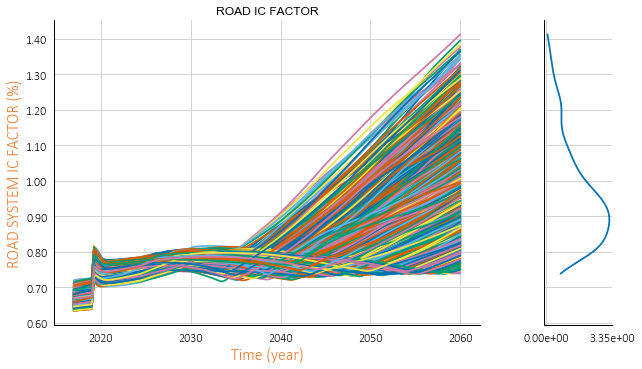

In [53]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_RoadIC_0_Road0Lock0_0_lines.png', dpi=300)

Sell By Date of the Road System Policy -> 2019 (T)

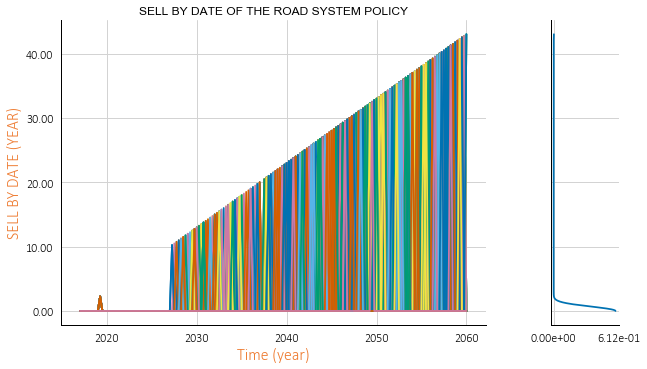

In [54]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of the Road System Policy'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of the Road System Policy'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateRoad_0_Road0Lock0_0_lines.png', dpi=300)

Sell By Date Sewer System - 2024

[MainProcess/WARNING] singular matrix


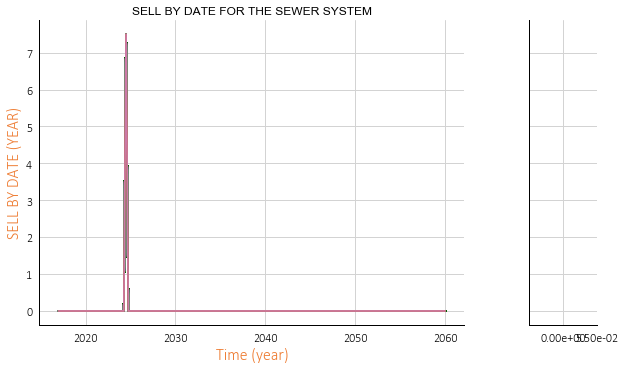

In [55]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date for the Sewer System'
fig, axes = lines(results, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date for the Sewer System'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_Sewer_0_Road0Lock0_0_lines.png', dpi=300)

## Step 1

# Road Intervention: "Lanes" -> 2017 incl. Sewer Intervention
# No Lock Intervention

Load Simulation File

In [76]:
file_name = wd + '\\PATHWAYS_1000runs_SimulationFile_Road3Lock0_HARD.tar.gz'
results1 = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\PATHWAYS_1000runs_SimulationFile_Road3Lock0_HARD.tar.gz


Road System IC Factor

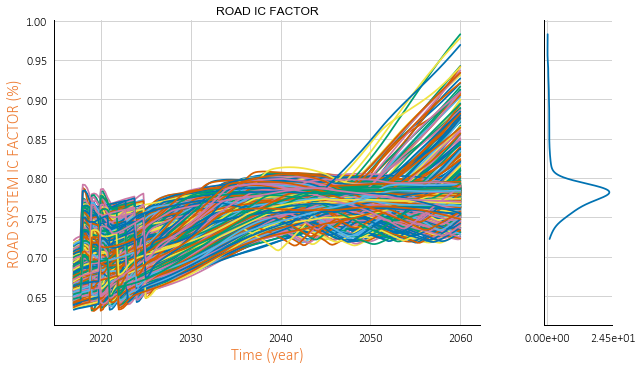

In [77]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = lines(results1, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_RoadIC_0_Road3Lock0_0_lines.png', dpi=300)

Sell By Date of the Road System Policy -> 2037 (F)

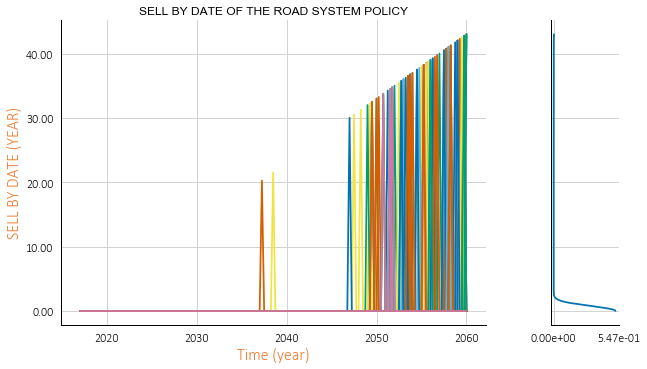

In [79]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of the Road System Policy'
fig, axes = lines(results1, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of the Road System Policy'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateRoad_0_Road3Lock0_0_lines.png', dpi=300)

Lock System IC Factor

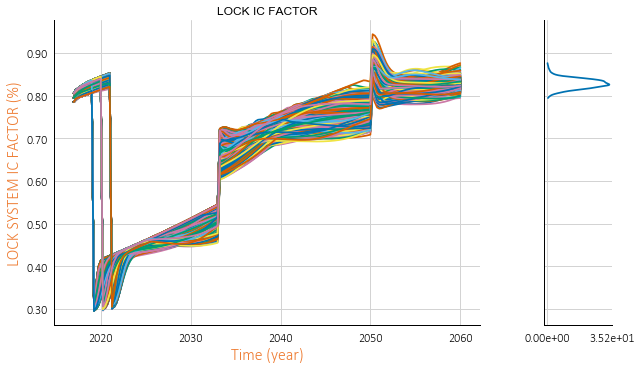

In [80]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = lines(results1, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_LockIC_0_Road3Lock0_0_lines.png', dpi=300)

Sell By Date of Lock System Policy IC Factor -> 2034 (T) 

[MainProcess/WARNING] singular matrix


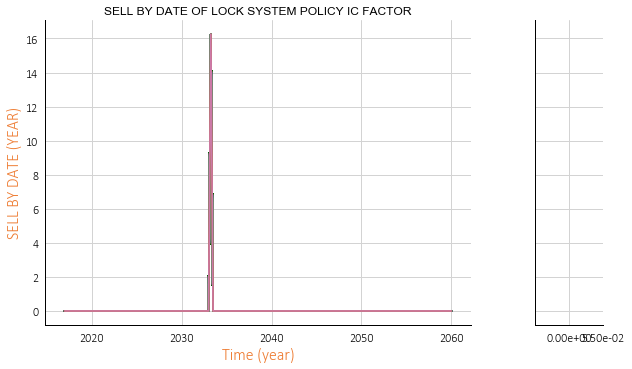

In [81]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of Lock System Policy IC Factor'
fig, axes = lines(results1, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of Lock System Policy IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateLock_0_Road3Lock0_0_lines.png', dpi=300)

## Step 2

# Road Intervention: "Lanes" -> 2017 incl. Sewer Intervention
# Lock Intervention: "Noordersluis" -> Direct after New Lock -> No Door Int.

Load Simulation File

In [87]:
file_name = wd + '\\PATHWAYS_1000runs_SimulationFile_Road3Lock1_HARD.tar.gz'
results2 = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\PATHWAYS_1000runs_SimulationFile_Road3Lock1_HARD.tar.gz


Road System IC Factor

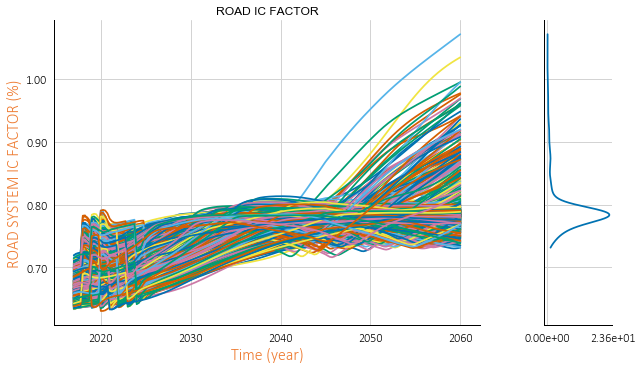

In [88]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = lines(results2, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_RoadIC_0_Road3Lock1_0_lines.png', dpi=300)

Sell By Date of the Road System Policy -> 2035 (F) !! Shifted due to Lock Intervention !!

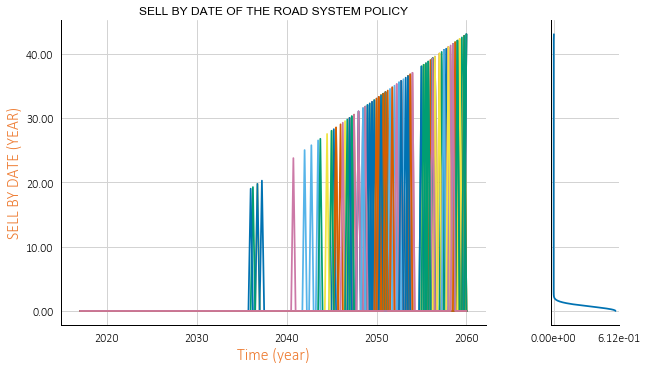

In [89]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of the Road System Policy'
fig, axes = lines(results2, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of the Road System Policy'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateRoad_0_Road3Lock1_0_lines.png', dpi=300)

Lock System IC Factor

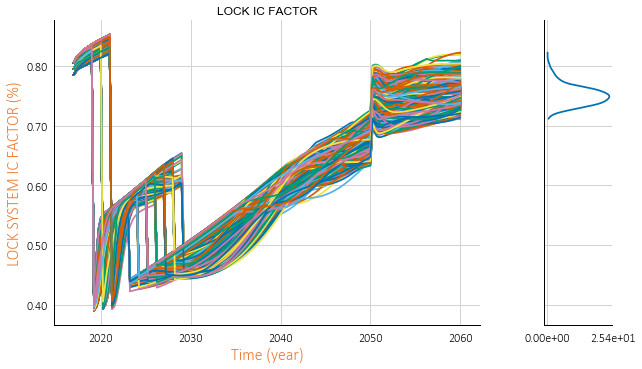

In [90]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = lines(results2, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_LockIC_0_Road3Lock1_0_lines.png', dpi=300)

Sell By Date of Lock System Policy IC Factor -> 2037 (F)  !! FIRST IS DURING CONSTRUCTION !!

[MainProcess/WARNING] singular matrix


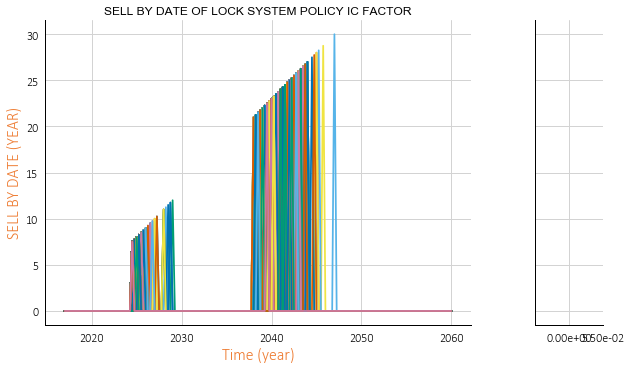

In [92]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of Lock System Policy IC Factor'
fig, axes = lines(results2, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of Lock System Policy IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateLock_0_Road3Lock1_0_lines.png', dpi=300)

## Step 3

# Add Road 2nd Intervention: "Lanes 2"
# No 2nd Lock Intervention

Load Simulation File

In [102]:
file_name = wd + '\\PATHWAYS_1000runs_SimulationFile_Road35Lock1_HARD.tar.gz'
results3 = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\PATHWAYS_1000runs_SimulationFile_Road35Lock1_HARD.tar.gz


Road System IC Factor

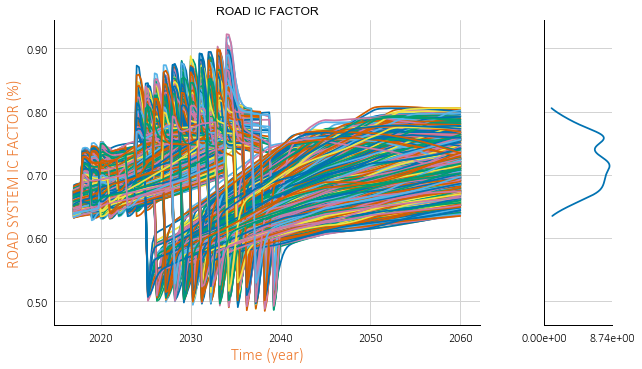

In [103]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = lines(results3, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_RoadIC_0_Road35Lock1_0_lines.png', dpi=300)

Sell By Date of the Road System Policy -> No Sell By Date, Only During Construction!

[MainProcess/WARNING] singular matrix


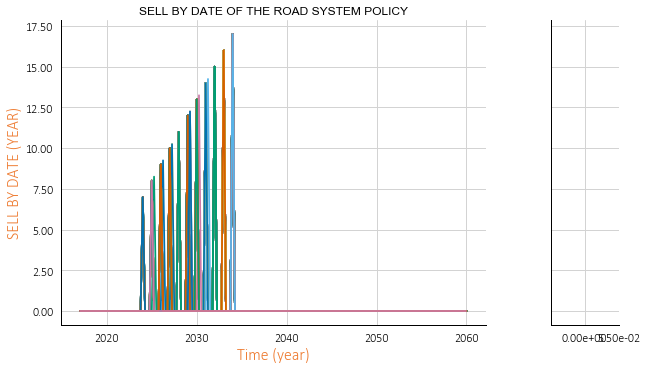

In [105]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of the Road System Policy'
fig, axes = lines(results3, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of the Road System Policy'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateRoad_0_Road35Lock1_0_lines.png', dpi=300)

Lock System IC Factor

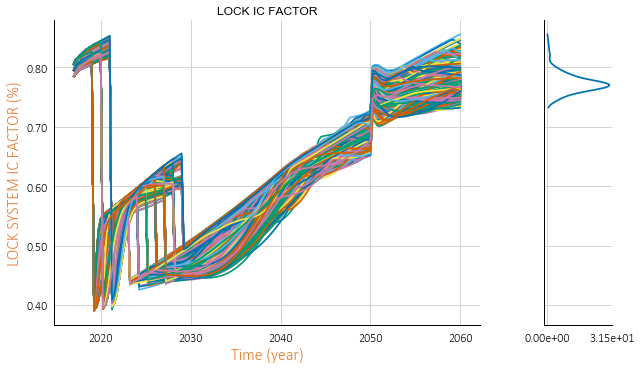

In [106]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = lines(results3, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_LockIC_0_Road35Lock1_0_lines.png', dpi=300)

Sell By Date of Lock System Policy IC Factor -> 2037 (F)  !! FIRST IS DURING CONSTRUCTION !!

[MainProcess/WARNING] singular matrix


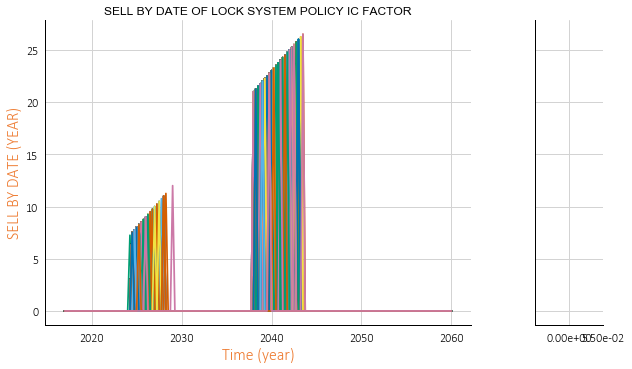

In [107]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of Lock System Policy IC Factor'
fig, axes = lines(results3, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of Lock System Policy IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateLock_0_Road35Lock1_0_lines.png', dpi=300)

## Step 4

# Add Road 2nd Intervention: "Lanes 2"
# Add Lock 2nd Intervention: "Build Inno Lock" + Increase Door Height

Load Simulation File

In [116]:
file_name = wd + '\\PATHWAYS_1000runs_SimulationFile_Road35Lock5_HARD.tar.gz'
results4 = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\PATHWAYS_1000runs_SimulationFile_Road35Lock5_HARD.tar.gz


Road System IC Factor

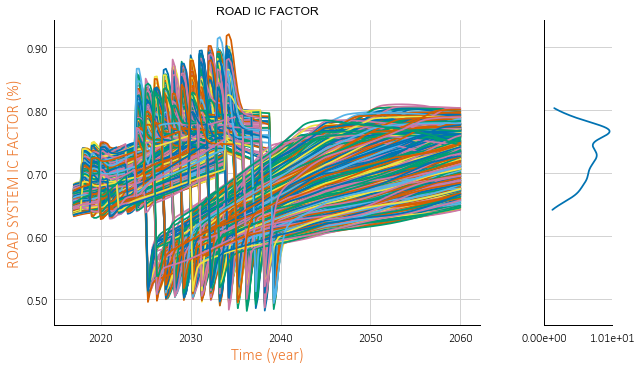

In [117]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = lines(results4, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_RoadIC_0_Road35Lock5_0_lines.png', dpi=300)

Sell By Date of the Road System Policy -> Only Construction

[MainProcess/WARNING] singular matrix


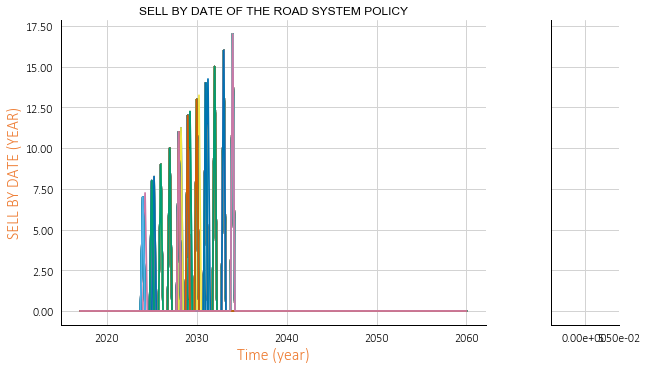

In [118]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of the Road System Policy'
fig, axes = lines(results4, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of the Road System Policy'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateRoad_0_Road35Lock5_0_lines.png', dpi=300)

Lock System IC Factor

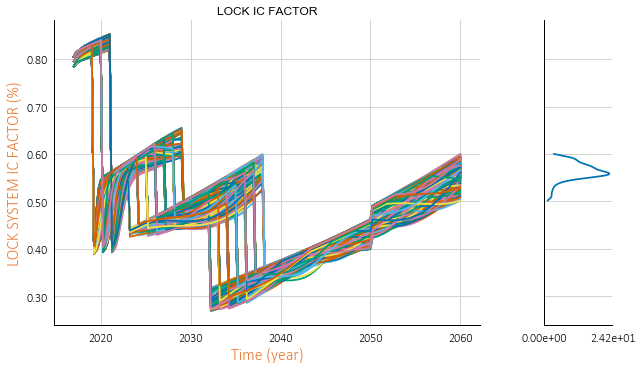

In [119]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = lines(results4, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_LockIC_0_Road35Lock5_0_lines.png', dpi=300)

Sell By Date of Lock System Policy IC Factor -> Only Construction

[MainProcess/WARNING] singular matrix


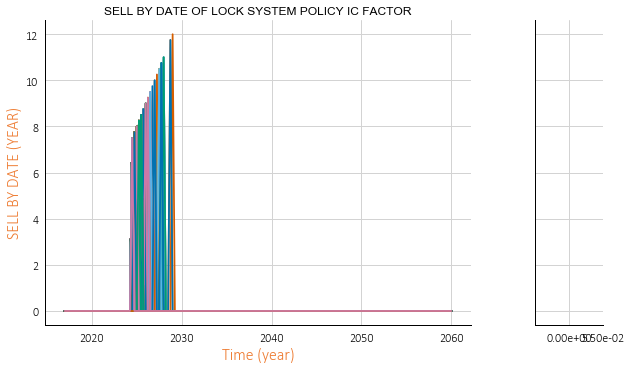

In [120]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Sell By Date of Lock System Policy IC Factor'
fig, axes = lines(results4, 
                  outcomes_to_show=outcome, 
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Sell By Date of Lock System Policy IC Factor'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_PATHWAYAnalysis_SellByDateLock_0_Road35Lock5_0_lines.png', dpi=300)